## Download Dataset

In [1]:
from graphviper.utils.data import download

download(file="Antennae_North.cal.lsrk.vis.zarr")

[2024-02-08 15:21:02,366]     INFO  graphviper:  File exists: Antennae_North.cal.lsrk.vis.zarr 


## Setup Dask Cluster

In [2]:
from graphviper.dask.client import local_client
viper_client = local_client(cores=4, memory_limit="4GB")
viper_client

[2024-02-08 15:21:02,486]     INFO  graphviper:  Checking parameter values for client.local_client 
[2024-02-08 15:21:02,487]     INFO      logger:  /Users/jsteeb/Dropbox/graphviper/ 
[2024-02-08 15:21:02,487]     INFO  graphviper:  Searching /Users/jsteeb/Dropbox/graphviper/ for configuration file, please wait ... 
[2024-02-08 15:21:02,669]  WARNING  graphviper:  It is recommended that the local cache directory be set using the dask_local_dir parameter. 
[2024-02-08 15:21:05,744]     INFO  graphviper:  Created client <MenrvaClient: 'tcp://127.0.0.1:55818' processes=4 threads=4, memory=14.90 GiB> 


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 14.90 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:55818,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 14.90 GiB
Comm: tcp://127.0.0.1:55829,Total threads: 1
Dashboard: http://127.0.0.1:55833/status,Memory: 3.73 GiB
Nanny: tcp://127.0.0.1:55821,


## Inspect Processing Set

In [3]:
from xradio.vis.read_processing_set import read_processing_set

intents = ["OBSERVE_TARGET#ON_SOURCE"]
ps_name = "Antennae_North.cal.lsrk.vis.zarr"
ps = read_processing_set(ps_name, intents=intents)
ps.summary()

,name,ddi,intent,field_id,field_name,start_frequency,end_frequency
0,Antennae_North.cal.lsrk_ddi_0_intent_OBSERVE_T...,0,OBSERVE_TARGET#ON_SOURCE,23,NGC4038 - Antennae North,3.430183e+11,3.448715e+11
1,Antennae_North.cal.lsrk_ddi_0_intent_OBSERVE_T...,0,OBSERVE_TARGET#ON_SOURCE,15,NGC4038 - Antennae North,3.430183e+11,3.448715e+11
2,Antennae_North.cal.lsrk_ddi_0_intent_OBSERVE_T...,0,OBSERVE_TARGET#ON_SOURCE,12,NGC4038 - Antennae North,3.430183e+11,3.448715e+11
3,Antennae_North.cal.lsrk_ddi_0_intent_OBSERVE_T...,0,OBSERVE_TARGET#ON_SOURCE,3,NGC4038 - Antennae North,3.430183e+11,3.448715e+11
4,Antennae_North.cal.lsrk_ddi_0_intent_OBSERVE_T...,0,OBSERVE_TARGET#ON_SOURCE,4,NGC4038 - Antennae North,3.430183e+11,3.448715e+11
5,Antennae_North.cal.lsrk_ddi_0_intent_OBSERVE_T...,0,OBSERVE_TARGET#ON_SOURCE,13,NGC4038 - Antennae North,3.430183e+11,3.448715e+11
6,Antennae_North.cal.lsrk_ddi_0_intent_OBSERVE_T...,0,OBSERVE_TARGET#ON_SOURCE,14,NGC4038 - Antennae North,3.430183e+11,3.448715e+11
7,Antennae_North.cal.lsrk_ddi_0_intent_OBSERVE_T...,0,OBSERVE_TARGET#ON_SOURCE,22,NGC4038 - Antennae North,3.430183e+11,3.448715e+11
8,Antennae_North.cal.lsrk_ddi_0_intent_OBSERVE_T...,0,OBSERVE_TARGET#ON_SOURCE,5,NGC4038 - Antennae North,3.430183e+11,3.448715e+11
9,Antennae_North.cal.lsrk_ddi_0_intent_OBSERVE_T...,0,OBSERVE_TARGET#ON_SOURCE,2,NGC4038 - Antennae North,3.430183e+11,3.448715e+11


## Run Cube Imaging Niter 0

In [4]:
ps_name = "Antennae_North.cal.lsrk.vis.zarr"
image_name = "Antennae_North_Cube.img.zarr"

import numpy as np
import os

grid_params = {}
grid_params["chan_mode"] = "cube"
grid_params["image_size"] = [500, 500]
grid_params["cell_size"] = np.array([-0.13, 0.13]) * np.pi / (180 * 3600)
grid_params["fft_padding"] = 1.0
grid_params["phase_direction"] = 12

data_variables = ["sky", "point_spread_function", "primary_beam"]

os.system("rm -rf " + image_name)
n_chunks = 60
from astroviper.imaging.cube_imaging_niter0 import cube_imaging_niter0

cube_imaging_niter0(ps_name, image_name, grid_params, n_chunks, data_variables)

## Inspect Image

In [5]:
import xarray as xr

img_xds = xr.open_zarr("Antennae_North_Cube.img.zarr")
img_xds

<xarray.Dataset>
Dimensions:                (frequency: 166, polarization: 2, l: 500, m: 500,
                            time: 1)
Coordinates:
    declination            (l, m) float64 dask.array<chunksize=(125, 250), meta=np.ndarray>
  * frequency              (frequency) float64 3.43e+11 3.43e+11 ... 3.449e+11
  * l                      (l) float64 0.0001576 0.0001569 ... -0.0001569
  * m                      (m) float64 -0.0001576 -0.0001569 ... 0.0001569
  * polarization           (polarization) <U2 'XX' 'YY'
    right_ascension        (l, m) float64 dask.array<chunksize=(125, 250), meta=np.ndarray>
  * time                   (time) float64 0.0
    velocity               (frequency) float64 dask.array<chunksize=(166,), meta=np.ndarray>
Data variables:
    POINT_SPREAD_FUNCTION  (frequency, polarization, l, m) float64 dask.array<chunksize=(3, 2, 500, 500), meta=np.ndarray>
    PRIMARY_BEAM           (frequency, polarization, l, m) float64 dask.array<chunksize=(3, 2, 500, 500), meta=np.ndarray>
    SKY                    (frequency, polarization, l, m) float64 dask.array<chunksize=(3, 2, 500, 500), meta=np.ndarray>
Attributes:
    active_mask:      
    beam:             None
    description:      
    direction:        {'latpole': {'type': 'quantity', 'units': 'rad', 'value...
    history:          None
    object_name:      
    obsdate:          {'format': 'MJD', 'scale': 'UTC', 'type': 'time', 'unit...
    observer:         Karl Jansky
    pointing_center:  {'initial': True, 'value': [3.149807242890337, -0.32929...
    telescope:        {'name': 'ALMA', 'position': {'ellipsoid': 'GRS80', 'ty...

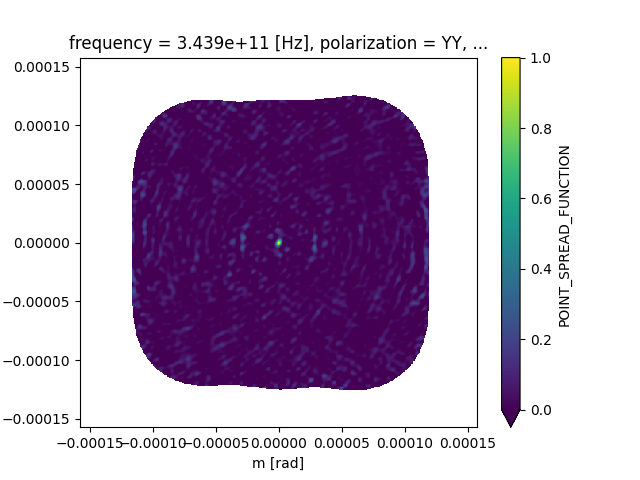

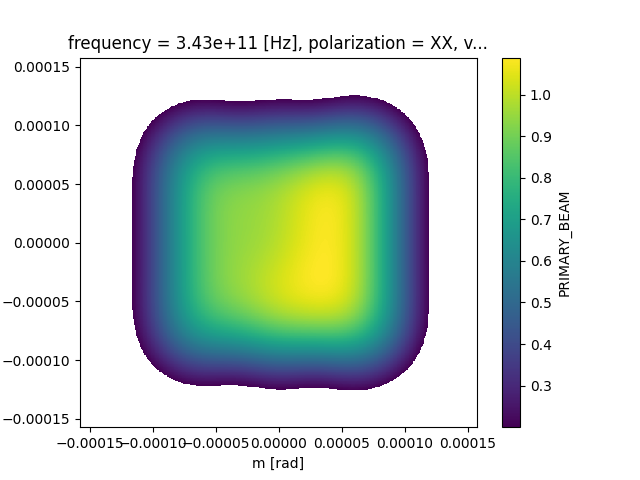

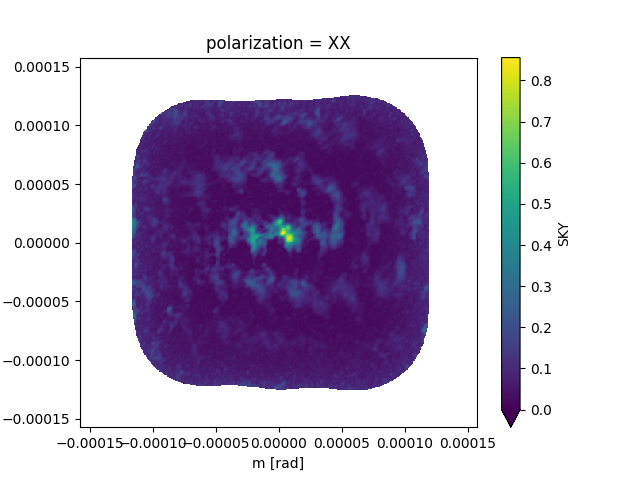

In [6]:
import matplotlib.pyplot as plt

%matplotlib widget
plt.figure()
img_xds.POINT_SPREAD_FUNCTION.isel(polarization=1, frequency=82).plot(cmap='viridis',vmin=0.0)
plt.figure()
img_xds.PRIMARY_BEAM.isel(polarization=0, frequency=0).plot()
plt.figure()
img_xds.SKY.max(dim="frequency").isel(polarization=0).plot(cmap='viridis',vmin=0.0)